# **Project Scope**

Having a well-defined structure before performing a task helps in efficient execution of the task. This is true even in cases of building a machine learning model. Once you have built a model on a dataset, you can easily break down the steps and define a structured Machine learning pipeline.

This notebook coveres the process of building an end-to-end Machine Learning pipeline and implementing it on  BigMart sales prediction dataset.


The dataset contains information about the stores, products and historical sales. We will predict the sales of the products in the stores.

We will start by building a prototype machine learning pipeline that will help us define the actual machine learning pipeline.

In [1]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration and Preprocessing

In [2]:
#loading train data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
#check for missing values
print("Train:\n")
print(train.isnull().sum().sort_values(ascending=False),"\n\n",train.isnull().sum()/train.shape[0] *100,"\n\n")
print("Test:\n")
print(test.isnull().sum().sort_values(ascending=False),"\n\n",test.isnull().sum()/test.shape[0] *100,"\n\n")


Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

Only Item_Weight and Outlet_Size have missing values.

Item_Weight is a continuous variable. We can use either mean or median to impute the missing values, but here we will use mean.

Outlet_Size is a categorical variable so will use mode to impute the missing values in the column.

In [4]:
#impute missing values in Item_Weight using mean
#train
train['Item_Weight'] = train['Item_Weight'].fillna(
train['Item_Weight'].dropna().mean())

#test
test['Item_Weight'] = test['Item_Weight'].fillna(
test['Item_Weight'].dropna().mean())

#checking if we filled missing values
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

In [5]:
#impute missing values in Outlet_Size using mode
#train
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].dropna().mode().values[0])
#test
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].dropna().mode().values[0])
#checking if we filled missing values
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

Machine learning models cannot work with categorical(string) data. We will convert the categorical variables into numeric types.

In [6]:
#list of all the numeric columns
num = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  train[num]
#categoric df
BM_cat = train[cat]
#checking categorical variables in the data
[train[category].value_counts() for category in cat[1:]]

[Item_Fat_Content
 Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: count, dtype: int64,
 Item_Type
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: count, dtype: int64,
 Outlet_Identifier
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: count, dtype: int64,
 Outlet_Size
 Medium    5203
 Small     2388
 High       932
 Name: count, dtype: int64,
 Outlet_Location_Type
 Tier 3    3350
 Tier 2   

In [7]:
#train
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#creating our new column for both datasets
train['Outlet_Age'], test['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

#uncomment to check result
train['Outlet_Age'].head
test['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Age, Length: 5681, dtype: int64>

Our data has the following categorical variables

* Item_Identifier
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Size
* Outlet_Type
* Outlet_Location_Type

We will use the categorical_encorders library to convert these variables into binary variables. We will not convert Item_Identifier.

In [10]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#Label Encoding
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [11]:
train.shape

(8523, 13)

In [12]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [18]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')


#get feature columns
train_oh.columns = OH_encoder.get_feature_names_out(cols)
test_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
train_oh.index = train.index
test_oh.index = test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
train_fe = pd.concat([train, train_oh], axis=1)
test_fe = pd.concat([test, test_oh], axis=1)

In [19]:
train_fe  = train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_fe = test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [20]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


Now that we have taken care of our categorical variables, we move on to the continous variables.
We will nnormalize the data in such a way that the range of all variables is almost similar.
We will use the StandardScaler function to do this.

In [21]:
from sklearn.preprocessing import StandardScaler
#create an object of the StandardScaler
scaler = StandardScaler()
#fit with the Item_MRP
#transform the data
train_scaled = train[['Item_MRP']].copy()
train_fe['Item_MRP_scaled'] = scaler.fit_transform(train_scaled[['Item_MRP']])





In [22]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP_scaled
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,1,0,0,1.747454
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,1,0,0,0,1,0,-1.489023
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,0,0,0,0,0,0,1,0,0,0.010040
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,1,0,0,0,0.660050
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,1,0,0,-1.399220


# Building the Model
We will use the Linear Regression and the Random Forest Regressor to predict the sales. We will create a validation set using the train_test_split() function.

test_size = 0.25 such that the validation set holds 25% of the data points while the train set has 75%.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#seperate the independent and target variable
y=train_fe['Item_Outlet_Sales']
X=train_fe.drop('Item_Outlet_Sales',axis = 1)


#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)



In [24]:
#shape of train test splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 28)
(2131, 28)
(6392,)
(2131,)


In [25]:
#Metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [26]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

Now that we have split our data, we will train a linear regression model on this data and check its performance on the validation set. We will use RMSE as an evaluation metric.

In [27]:
#LinearRegression
lin_reg = LinearRegression()
#fit the model
lin_reg.fit(X_train,y_train)

#predict the target on train and validation data
y_predict = lin_reg.predict(X_test)
# RMSE on train and validation data
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(lin_reg, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(lin_reg,LinearRegression(),X,y,5)

 Mean Absolute Error: 860.97

 Mean Squared Error: 1320412.0

 R^2 Score: 0.5593

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


In [44]:
import joblib
joblib.dump(lin_reg, 'model1.pkl')

['model1.pkl']

In [29]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")     

We will train a random forest regressor and see if we can get an improvement on the train and validation errors.

In [31]:
#RandomForestRegressor

#model
rf_reg = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
rf_reg.fit(X_train, y_train)
#predict
y_predict = rf_reg.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(rf_reg, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(rf_reg,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 784.05

 Mean Squared Error: 1232766.49

 R^2 Score: 0.5885

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.53
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5498


In [32]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")     

We can see a significant improvement on the RMSE values. The random forest algorithm gives us 'feature importance for all the variables in the data.

We have 45 features and not all of these features may be useful in forecasting. We will select the top 7 features which had a major contribution in forecasting sales values.

If the model performance is similar in both cases (by using 45 features and by using 7 features), then we should only use the top 7 features, in order to keep the model simple and efficient.

The goal is to have a less complex model without compromising on the overall model performance.

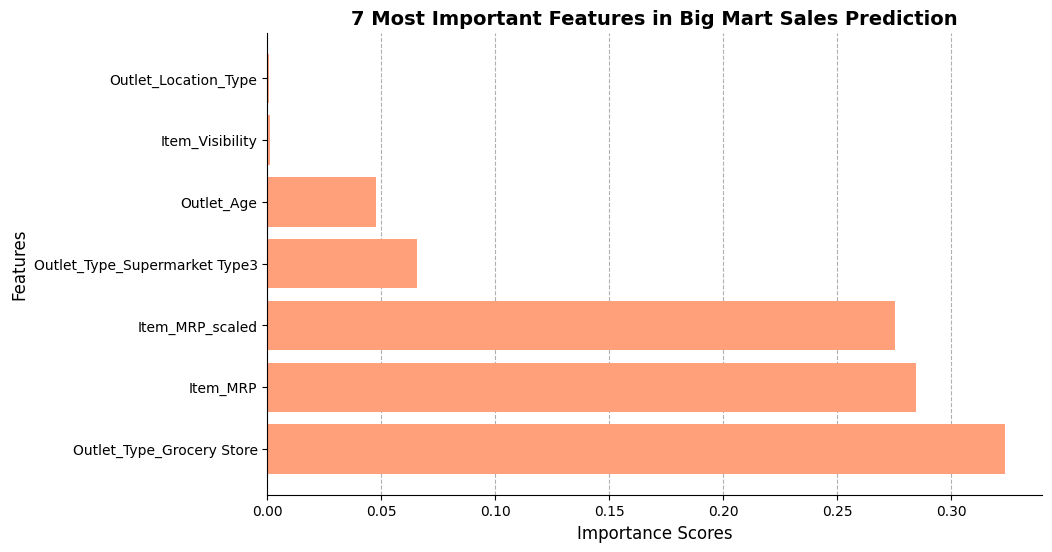

In [33]:
import seaborn as sns
#plot the 7 most important features
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 7 most important features
top_indices = indices[:7]
top_features = X.columns[top_indices]
top_importances = importances[top_indices]

# Create a bar plot of the top 7 features
plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances, color='#FFA07A')
plt.xlabel('Importance Scores', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('7 Most Important Features in Big Mart Sales Prediction', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().xaxis.grid(True, linestyle='--')
plt.gca().set_axisbelow(True)
plt.show()

In [34]:
#training data with top 7 features
X_train_important = X_train.iloc[:, indices[:7]]
rf_reg.fit(X_train_important,y_train)
#validation data with top 7 important features
y_pred = rf_reg.predict(X_train_important)

# Evaluate the performance of your model on the selected features
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(rf_reg, X, y, cv=5).mean(),4)
#create an object of the RandomForestRegressor Model
rf_reg1 = RandomForestRegressor(n_estimators=100, random_state=0)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(rf_reg1,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 784.05

 Mean Squared Error: 1232766.49

 R^2 Score: 0.5885

RandomForestRegressor(random_state=0) Scores:
0.57
0.53
0.52
0.56
0.57
Average RandomForestRegressor(random_state=0) score: 0.5492


Using only 7 features has given us almost the same perfomance as the previous model where we were using 45 features. Now we will identify the final set of features that we need and the preprocessing steps for each of them.

# Identifying features to build the Machine Learning pipeline
We must list down the final set of features and necessary preprocessing steps for each of them, to be used in the ML pipeline. Since the RandomForestRegressor model with 7 features gave us almost the same performance as the previous model with 45 features, we will only use these features for our ML pipeline.

# Selected features and preprocessing steps
* **Item_MRP:** It holds the price of the products. During the preprocessing step we used a standard scaler to scale these values.
* **Outlet_Type_Grocery Store:** A binary column which indcates if the outlet type is a grocery store or not. To use this information in the model building process, we will add a binary feature in the existing data that contains 1 (if outlet type is a grocery store) and 0 (if the outlet type is something else).
* **Item_Visibility:** Denotes visibility of products in the store. Since this variable had a small value range and no missing values, we did not apply any preprocessing steps on this variable.
* **Outlet_Type_Supermarket Type3:** Another binary column indicating if the outlet type is a 'supermarket_type_3' or not. To capture this information we will create a binary feature that stores 1 (if outlet type is supermarket_type_3) and 0 (if not).
* **Outlet_Identifier_OUT027:8** This feature specifies whether the outlet identifier is 'OUT027' or not. Similar to the  previous example, we will create a seperate column that carries 1 (if outlet identifier is OUT027) or 0 (if otherwise).
* **Outlet_Establishment_Year:** This describes the year of establishment of the stores. Since we did not perform any transformation on values in this column, we will not preprocess it in the pipeline.
* **Item_Weight:** During preprocessing we observed that this column had missing values. These missing values were imputed using the average of the column. This has to be taken into account while building the pipeline.

We will drop the other columns since we will not use them to train the model.


# Pipeline Design
We have built a prototype to understand the preprocessing requirement for our data. It is now time to form a pipeline design based on our learning from the prototype. We will define the pipeline in 3 stages:

1. Create the required binary features
2. Perform required data preprocessing and transformations:
*  Drop the columns that are not required
*  Missing value imputation (Item_Weight) by average
*  Scale the Item_MRP
3. Random Forest Regressor

# 1. Create the required binary features
We will create a custom transformer that will add 3 new binary columns to the existing data.

* Outlet_Type: Grocery Store
* Outlet_Type: Supermarket Type3
* Outlet_Identifier_OUT027

# 2. Data Preprocessing and transformations
We will use a column transformer to do the required transformations. It will contain 3 steps:

* Drop the columns that are not required for model training
* Impute missing values in the column Item_Weight using the average
* Scale the column Item_MRP using StandardScaler()

# 3. Use the model to predict the target on the cleaned data
This will be the final step in the pipeline. In the last two steps we preprocessed the data and made it ready for the model building process. We will use this data and build a machine learning model to predict the Item Outlet Sales.

# Building the pipeline
We will read the data set and seperate the independent and target variable from the training dataset.

In [35]:
#importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [37]:
#read training dataset
train2 = pd.read_csv("Train.csv")
clean_data = train

In [38]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
dtype: object

In [39]:
#seperate the independent and target variables
X = clean_data.drop(columns = ['Item_Outlet_Sales'])
y = clean_data['Item_Outlet_Sales']

We need to create 3 new binary columns using a custom transformer. Here are the steps we need to follow to create a custom transformer.

* Define a class OutletTypeEncoder
* Add the parameter BaseEstimator while defining the class
* The class must contain fit and transform methods
* In the transform method, we will define all the 3 columns that we want after the first stage in our ML pipeline.

In [41]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
    
class OutletTypeEncoder(BaseEstimator):
    
    def __init__(self, base_estimator=None):
        self.base_estimator = base_estimator
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        X['Outlet_Type_Grocery Store'] = (train2['Outlet_Type'] == 'Grocery Store').astype(int)
        X['Outlet_Type_SupermarketType3'] = (train2['Outlet_Type'] == 'Supermarket Type3').astype(int)
        X['Outlet_Identifier_OUT027'] = (train2['Outlet_Identifier'] == 'OUT027').astype(int)
        return X


Next we will define the pre-processing steps required before the model building process.

* Drop the columns – Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year
* Impute missing values in column Item_Weight with mean
* Scale the column Item_MRP using StandardScaler().
This will be the second step in our machine learning pipeline. After this step, the data will be ready to be used by the model to make predictions.

In [42]:
# Drop the columns - 
X = X.drop(columns=['Item_Identifier', 'Outlet_Identifier','Item_Type', 'Outlet_Identifier','Outlet_Establishment_Year'])
# Impute the missing values in column Item_Weight by mean
X['Item_Weight'] = X['Item_Weight'].fillna(X['Item_Weight'].mean()) 
# Scale the data in the column Item_MRP
scaled_train = scaler.fit_transform(X['Item_MRP'].values.reshape(-1, 1))


# Predict the target
This will be the final block of the machine learning pipeline. We will specify 3 steps – create binary columns, preprocess the data, train a model.

When we use the fit() function with a pipeline object, all three steps are executed. Post the model training process, we use the predict() function that uses the trained model to generate the predictions.

In [43]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X, y, test_size=0.25, random_state=42)
# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
pipeline = Pipeline([
    ('outlet_encoder', OutletTypeEncoder()),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])
# fit the pipeline with the training data
pipeline.fit(X_train,Y_train)

# predict target values on the training data
#Write your code here
train_predictions = pipeline.predict(X_validate)

ValueError: could not convert string to float: 'Supermarket Type2'

Now, we will read the test data set and we call predict function only on the pipeline object to make predictions on the test data.

In [ ]:
# read the test data
test = pd.read_csv("/content/Test.csv")

In [ ]:
# predict target variables on the test data 
y_sub = pipeline.predict(test)
y_sub

In [ ]:
sub = pd.read_csv("Submission.csv")
sub["Item_Outlet_Sales"] = y_sub
sub.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1646.054836
1,1,FDW14,OUT017,1305.429801
2,2,NCN55,OUT010,658.423251
3,3,FDQ58,OUT017,2333.948545
4,4,FDY38,OUT027,5954.092896


In [ ]:
sub.to_csv("submission.csv", index=False)